<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Challenge" data-toc-modified-id="Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Challenge</a></span><ul class="toc-item"><li><span><a href="#Derivatives:-Formal-Definition" data-toc-modified-id="Derivatives:-Formal-Definition-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Derivatives: Formal Definition</a></span></li><li><span><a href="#Backward-finite-difference-approximation-for-a-derivative" data-toc-modified-id="Backward-finite-difference-approximation-for-a-derivative-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Backward finite difference approximation for a derivative</a></span></li><li><span><a href="#For-Loops-in-MATLAB/Octave" data-toc-modified-id="For-Loops-in-MATLAB/Octave-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>For-Loops in MATLAB/Octave</a></span></li><li><span><a href="#Differential-equations:-Definition" data-toc-modified-id="Differential-equations:-Definition-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Differential equations: Definition</a></span></li></ul></li><li><span><a href="#Assignment" data-toc-modified-id="Assignment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Assignment</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Summary-of-Model-Construction-Disciplined-Process-for-Reading-05" data-toc-modified-id="Summary-of-Model-Construction-Disciplined-Process-for-Reading-05-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Summary of Model Construction Disciplined Process for Reading 05</a></span></li></ul></li><li><span><a href="#Deliverables:-Model-Construction" data-toc-modified-id="Deliverables:-Model-Construction-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Deliverables: Model Construction</a></span></li><li><span><a href="#Deliverables:-Finish-Model-Construction-and-Evaluate-Your-Model" data-toc-modified-id="Deliverables:-Finish-Model-Construction-and-Evaluate-Your-Model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Deliverables: Finish Model Construction and Evaluate Your Model</a></span></li></ul></li></ul></div>

# Challenge

**In this notebook's challenge, you will use collected data to develop a model that can *accurately predict* behavior well beyond the scope of the original data.**  You will build a model of the tank's height as a function of time in order to predict the height of the tank up to two minutes after it begins draining from a height of $7.4cm$.

In the last challenge, you used *linear extrapolation* to predict a system's behavior beyond the boundaries of what was already measured. Hopefully, you saw the utility of linear extrapolation, but also its limitations. We will try to address some of these in this notebook.


Because you'll be asked to work with the tank data for the assignment in this notebook, we will start by using a dataset for the partial drain of the tank you saw in the last reading. Collected using a different experiment than the dataset provided to you in the last reading, this one was collected using a very accurate laser transducer. Data were collected for the first 70 seconds of the experiment only.

In [ ]:
%%html
<iframe width="900" height="540" src="https://www.youtube.com/embed/1INwzxfcTfQ" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>


In [ ]:
data = load('reading5data.txt');
t = data(:,1);
y = data(:,2);
figure
plot(t,y,'ks-')
xlabel('Time (s)')
ylabel('Water Height y (m)')

In order to understand *why* extrapolation can be limiting, it is important to understand why using a *straight line* to represent how the system's output evolves over time is often a miss.

Visually, it is fairly easy to see that the plot representing height vs. time in the plot above has "curvature," and is not itself a straight line, so this makes sense intuitively. In the last assignment, extrapolation only worked for very small extensions beyond the scope of the original data, because it seems that as time goes on, *the slope of the plot gets less and less steep,* hence the curvature we see. Because the slope of the tangent line to a function $y(t)$ is its *time derivative*, we can get more insight if we study the time derivative of the data!

To do this, let's look once again at the definition of a derivative, this time a bit more formally.

## Derivatives: Formal Definition

The derivative of y with respect to time, or $\frac{dy}{dt}$, is the *slope* of a line tangent to the y vs. time curve at a particular point. We will use the following formal definition of the derivative of some dependent variable $y$ with respect to some independent variable $t$ at some specific value of $t=a$ :

$$\frac{dy(t)}{dt}|_{t=a} = \lim_{h \rightarrow 0} \frac{y(a) - y(a-h)}{h}$$

You may also have seen a similar, but subtly different definition of the derivative:

$$\frac{dy(t)}{dt}|_{t=a} = \lim_{h \rightarrow 0} \frac{y(a+h)-y(a)}{h}$$

This is essentially equivalent. You could think of this version as approaching the "true" derivative from the right-hand side of the point "a," where the first definition approaches the "true" derivative from the left-hand side of "a." Because they will produce the same results in the situations we'll encounter in this course, we will stick with the first definition.

Importantly, this equation looks like a *slope* or "rise/run" equation. Using the interactive plot below, watch how this slope's accuracy changes as the value of $h$, or the time-difference between the two points used to calculate the derivative, gets larger or smaller. If the cell below shows up blank, click on it and hit Shift+Enter.

In [ ]:
%%html
<iframe width="900" height="540" src="https://workbench.lafayette.edu/~brownaa/derivplot/derivplot.html" frameborder="0"  allowfullscreen></iframe>

As you likely noticed, the line representing the "approximate derivative" of the function at some time "a" is most accurate when the value of "h" is smallest. This makes sense, since the *true* derivative is computed in the limit as h goes to zero.

Now, you probably learned many rules for calculating the derivatives of particular functions. For instance, we know that:

$$\frac{d}{dt} (t^2) = 2t$$

and so on. Rules for taking derivatives are [easy to find](https://www.mathsisfun.com/calculus/derivatives-rules.html) in many places!

But if we are dealing with unfamiliar data or system behavior, we may not know what the function $y(t)$ is, **or even what functional form it should take**, so it may be (and often is) necessary to *approximate* the derivative. We often do this using the "finite difference approximation." 

## Backward finite difference approximation for a derivative

If the functional form of our data is unknown, making an *exact* derivative calculation impossible, or if approximating the derivative of data we collect is warranted, we can *approximate* the derivative of our output function $y(t)$ at some time $t = t(k)$, or the $k^{th}$ value of time $t$, by the following formula:

$$\left. \frac{d}{dt} y(t)\right|_{t=t(k)} \approx \frac{y(k)-y(k-1)}{t(k)-t(k-1)}$$

This approximation is not very good (see the definition of a derivative) unless the difference between times $t$ in our dataset is very small relative to how the output $y$ changes. This approximation is equivalent to a statement of the *slope* of the data in between times $t=t(k)$ and $t=t(k-1)$, which should be familiar from discussions of *linear interpolation* and *linear extrapolation*.  

An example is given below in the MATLAB/Octave language, in which we compute the derivative of some data and then use this derivative to draw a line tangent to the data at a time of our choosing. Think of this like a "static" version of the interactive plot in the cell above.

In [ ]:
%define the time at which we want to compute an approximate derivative
tderiv = 0.5; %you can feel free to try other values! 

%define some time data
t = 0:.01:1; %this creates a 'long' array of times 1 row by n columns, starting at 0, with a timestep of .01, ending at 1.
y = sin(2*pi*t);% a sine wave is nice.

%now find out which index in the time array gives us a time closest to "tderiv."
%we will use MATLAB's "find" command for this. use "help find" to learn more.
k = find(t>=tderiv,1,'first');

%now calculate the derivative at our chosen time.
dydt = (y(k)-y(k-1))/(t(k)-t(k-1))

%now let's draw the tangent line in point-slope form
tangentline = dydt*(t-t(k))+y(k);

%now let's plot our data with the derivative on top to see how we did.
figure
plot(t,y,'k',t,tangentline,'r')
xlabel('Time (s)')
ylabel('y (?)')
legend('data','tangent line')

As you can see, using the smallest possible value of "h" from the formal definition of the derivative above means computing the slope of "y" using two points that are right next to one another in our dataset. The more "coarse" our data are in time with respect to how the output "y" changes, the worse this approximation will be. This is why it is usually desirable to collect data *as fast as possible*, with as many "points per second" as you possibly can. It makes taking approximate derivatives more accurate.

You can imagine that this might help us understand how the "slope" or derivative of the data at the beginning of this notebook changes. However, this would require us to calculate the approximate derivative of our data *at every point in the data*. This might sound like a task that could get very tedious in code, especially for datasets that might be thousands or *millions* of points long. Thankfully, MATLAB/Octave (as well as most other programming languages) has a structure that we can use to make repetitive calculations simple to implement: The "for loop."

## For-Loops in MATLAB/Octave

In MATLAB/Octave, a "for loop" can be used to perform repetitive calculations easily. The syntax looks like this:

```matlab
for k=1:10
    (operations to be repeated 10 times go here)
end
```

the index `k` begins at 1. Then, whatever operations you need to perform go between the "for" and the "end" lines. Once the loop hits the "end" line, it goes back to the top of the "for" loop and increases `k` by 1. It does this until `k=10`. Then, the loop completes for the last time. Let's look at an example, in which we use a for-loop to create an array where each entry is equal to 2*k.

The output `a(k)` in the code below is unsuppressed, so you can see how the code "builds" the array `a` one column at a time. If you suppress that line using a semicolon, you will not have to see all of the "intermediate" actions of the code.

In [ ]:
% initialize the array
a = zeros(1,5)% this creates an array of all zeros, with dimensions 1 row by 1 columns.

for k = 1:length(a) % notice length(a) here. This automatically sees how many times the loop should run (5 in this case)
    %print k so we can see what it is
    k
    %fill in this entry in a
    a(k) = 2*k
end

For our particular problem, where we want to be able to compute the approximate derivative for our data for every entry in the dataset, we can use a similar for-loop. **But there is a problem!** Because we need to compute the approximate derivative using the difference between `y(k)` and `y(k-1)`, we cannot start the loop at an index of k=1! We need to start the loop at `k=2` instead so that we have a point to access at `y(k-1)` on the first loop!

This means that in computing the derivative, we will "lose" one of the points in our array. We won't know what the true derivative of the data was at `t(1)`, or right at the beginning of our dataset.

In [ ]:
% re-load our original dataset from the top of the notebook.
clear all
data = load('reading5data.txt');
t = data(:,1);
y = data(:,2);


% compute dydt for every entry. Once we do this, we will plot it!
for k=2:length(y)
    %compute the approximate derivative at this time value using the backwards approximation.
    %note that we use dydt(k-1) here so that our new array has an initial value at k=1
    %this is important because the "first" derivative we calculate, which should go first in the 
    %array, is actually the approximate derivative for our SECOND y-value!
    dydt(k-1) = (y(k)-y(k-1))/(t(k)-t(k-1));
    %now fill in a time vector that will go with this derivative, and be the same length for plotting
    tderiv(k-1) = t(k); %just pull out the current time from the original data
end

%now plot our original data to remind us what it looks like.
figure
plot(t,y,'ko-')
ylabel('y')
xlabel('Time (s)')
figure
plot(tderiv,dydt,'ro-')
ylabel('dydt')
xlabel('Time (s)')
    

This plot could be interpreted as a new "lookup table," of sorts. We could use it to make our 
interpolation-based empirical model easier to implement, since we would always know the slope "m" (which *is the approximate derivative!*) within the bounds of the data we collected. But this still **does not** help us with predicting the height of the water *outside the boundaries of our original lookup table*. 

At this point, let's turn to some physical observations we can make using the video of our tank-drain experiment. We can see that when the tank is more full, more water seems to "squirt out" of the valve. When the tank is more empty,  less water seems to "squirt out" of the valve. When the tank is empty, the flow out of the tank stops. 

What does this mean? Well, this type of "qualitative modeling" that we can do using observation is extremely powerful for developing intuition about how a system will act, but it is not actionable. We can't directly use terms like "more squirts out when the water level is higher" to build a mathematical model... at least, not without turning those imprecise statements into mathematical ones.

So how could we *quantify* something like "more water squirts out when the tank is more full?" Well, if more water squirts out of the valve, it stands to reason that the tank's height will drop more quickly. The words "more quickly" imply a rate of change, which implies *a time derivative*. So if we can see that the *rate of change* of the tank's height depends somehow on the tank's *current height*, we have a direction to go with the math. 

Let's use this idea and try to understand how the *derivative of tank height*, $\frac{dy}{dt}$, depends on tank height itself, $y$. We will do this by plotting $\frac{dy}{dt}$ against $y$ in the MATLAB/Octave cell below.

In [ ]:
% to plot these two together, we will have to "chop" the height array so that the two arrays (y and dydt) are the same length.
% otherwise we will not be able to plot  them! We know that the first value of dydt corresponds to the *second* value of y.
% therefore, we will redefine y starting from the second entry in the array.
y2 = y(2:end);

%now plot y on the x axis and dydt on the y axis to see how dydt depends on y.
figure
plot(y2,dydt,'kx')
xlabel('Tank Height, y (m)')
ylabel('Rate of Change of Tank Height, dydt (m/s)')

Interesting! The derivative of the tank height seems to be a *linear function* of the height itself! It is also obvious that our qualitative description of the process is confirmed when we look at this plot. We said that "the water squirts out more when the tank height is larger." When the tank height is largest, around $7.4cm$, in the plot above, we can see that the derivative is at the *most negative value*, which means that the height is dropping as quick as it ever will. Near the end of the experiment, when the water was closer to $5.7cm$, the rate at which the height dropped was much smaller.

Knowing that the relationship looks linear, we could write the relationship between $y$ and $\frac{dy}{dt}$ using the equation of a line. Perhaps something like:

$$ \frac{dy}{dt} = ay + b$$

where $a$ is the slope of the linear relationship between height and its time derivative, and $b$ is a constant offset.

Let's digest what this equation actually tells us: it says that "the slope of the line y(t) is a linear function of y(t) itself." Using this fact, we could extend our method of "extrapolation" from the last assignment by "knowing" what the slope of the extrapolated line should be given the current value of y. This means that we now have a **model** for **how the slope of the line y(t) varies as y(t) itself changes.** This implies that given *any* current height, we will be able to find out what the *slope* of the y(t) curve is at that moment.

It makes sense at this point to give this type of equation a name, because it will form the foundation of nearly everything we will do for this rest of this course. 

Equations in which the derivative of a variable of interest (y, in this case) are functions of the current values of that variable are called **differential equations**.

## Differential equations: Definition

A differential equation is any equation that relates one or more functions of interest to their derivatives. One of the simplest examples of this is an equation that relates some function $y$ to its first time derivative $\frac{dy}{dt}$ using some functional relationship $f$, in the absence of any external inputs:
$$\frac{dy}{dt} = f(y)$$

The function $f$ can be anything, and could depend on more than just $y$, but many physical processes are well-described in certain regions of their behavior by *linear* differential equations, where the function $f$ is linear.

Great! Now we have a name to put with the "face" of the relationship we saw between the water height and its derivative. But how does this help?

It is true that there is an entire course (which you will most likely take) dedicated to *solving* differential equations, and it's also true that as the semester goes on, we will discuss what to do with equations like this in more detail. but for now, it might appear that we're "out of tools" again, unless you've already taken differential equations, and you already know how to find a function $y(t)$ that will satisfy the differential equation written above.

However, going back to the last assignment, recall that we used the *slope* of our height vs. time plot to extrapolate a prediction of the tank's height outside the bounds of our original lookup table. This worked, but only when the prediction time was very small... because the longer the time difference we tried to extrapolate over, the *more wrong we were about the slope of the height vs. time graph.* **This is where having the relationship between $\frac{dy}{dt}$ and $y$ is helpful!**. 

# Assignment


In today's assignment, you will once again produce predictions for the height of the water in the tank at the following times:

`tpred = [ 80 90 100 110 120]` (seconds)

You will once again use the following video to evaluate your model. If you collected data for these times in the last assignment, you can re-use those measurements here rather than collecting a new set.

In [ ]:
%%html
<iframe width="900" height="540" src="https://www.youtube.com/embed/1INwzxfcTfQ" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>


To make these predictions in this assignment, you will extrapolate in small steps, each time using the equation $\frac{dy}{dt} = f(y)$ to tell you what "slope" to use for each extrapolation step. **This is an improvement from our approach in Reading 04, where our "model" for the slope of the line was that it was a constant defined by the last two points in our lookup table. Now, we have a more robust "model" for the slope of the line (it's our differential equation)!**

This idea is shown graphically in the figures below. To obtain the first prediction, for $t=80s$, you will use the last data point in the dataset provided to you with this notebook (reading5data.txt). You will use this value, along with *an equation for how $\frac{dy}{dt}$ changes with $y$,* to find the "slope" you should be using for extrapolation. This will allow you to get an estimate for the height $y$ for $t=80s$. In the figure below, this is shown as $h_4$.

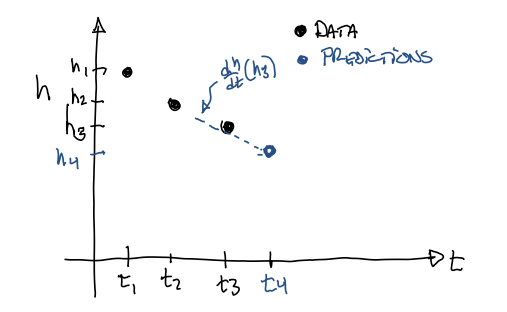

Then, to get your estimate for the height at $t=90s$, you will use **this new prediction h4** to find a *new slope* $\frac{dy}{dt}$ based on your equation relating $\frac{dy}{dt}$ to $y$. You will use this new slope to make a new, short-term extrapolation from $t=80s$ to $t=90s$. This is shown graphically below.

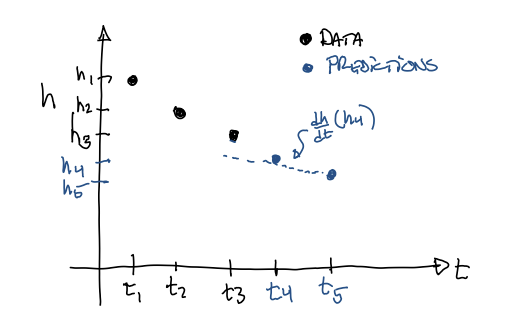

You will repeat these calculations for all of the requested prediction times. For each prediction, you will start your extrapolation *from the most recent prediction*, and use that value of the tank height when deciding what slope to use in your extrapolation. Your disciplined process should follow these steps:

### Summary of Model Construction Disciplined Process for Reading 05

1. Create a "model" for how $\frac{dy}{dt}$ changes as a function of $y$ (not time, just yet). You can use an approximate linear fit for this assignment such as $\frac{dy}{dt} = ay + b$.
2. Extrapolate from the last point in your model forward in time using extrapolation as in Reading 04 using point-slope form, computing the slope for your extrapolation, $m=\frac{dy}{dt}$ using the differential equation in step 1.
3. Repeat this process as needed, using the "latest prediction" to compute your slope each time.

## Deliverables: Model Construction

Using a plot of $\frac{dy}{dt}$ vs $y$, come up with an equation relating the height of water in the tank to the rate at which that height changes (step 1 in the disciplined process above). Present your equation in point-slope or slope-intercept form in the markdown cell below. A code cell is also provided to you so that you can plot how well your equation fits the plot of dydt vs. y. Think of this as a mini model evaluation step-- you want to confirm that your relationship for the derivative is accurate.  

YOUR ANSWER HERE

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

## Deliverables: Finish Model Construction and Evaluate Your Model

Once you have developed a relationship between $\frac{dy}{dt}$ and $y$, you will use this equation to repeatedly perform a short-horizon (10 second) extrapolation, starting from $t=70s$ to $t=80s$, and eventually predicting the height of the water at the following times:

`tpred = [ 80 90 100 110 120]`

Then, evaluate your model agains the data you collect for the tank height vs. time in the video provided above. Produce a well-labeled plot with a legend that shows the accuracy of your model. This can be achieved using steps 2 and 3 of the disciplined proces above.

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')